In [56]:
!pip install langgraph langsmith

In [57]:
!pip install langchain langchain_groq langchain_community

In [58]:
from google.colab import userdata
groq_Api=userdata.get('groq_Api')
landsmith_api=userdata.get('langsmith_Api')

In [59]:
import os
os.environ["LANGCHAIN_API_KEY"] = landsmith_api
os.environ["LANGCHAIN_TRACING_V2"] = "true"
os.environ["LANGCHAIN_PROJECT"] = "CourseLanggraph"

In [60]:
from langchain_groq import ChatGroq


In [46]:
llm=ChatGroq(groq_api_key=groq_Api,model_name="gemma2-9b-it")
llm

ChatGroq(client=<groq.resources.chat.completions.Completions object at 0x7e79ddf37f10>, async_client=<groq.resources.chat.completions.AsyncCompletions object at 0x7e79ddb6d910>, model_name='gemma2-9b-it', model_kwargs={}, groq_api_key=SecretStr('**********'))

In [47]:
from typing import Annotated
from typing_extensions import TypedDict
from langgraph.graph import StateGraph,START,END
from langgraph.graph.message import add_messages

In [48]:
class State(TypedDict):
    #it helps to append in message and how to langraph going to work
    messages:Annotated[list,add_messages]
graph_builder=StateGraph(State)

graph_builder

In [50]:
def chatbot(state:State):
  return {"messages":llm.invoke(state['messages'])}

In [51]:
graph_builder.add_node("chatbot",chatbot)
graph_builder

In [52]:
graph_builder.add_edge(START,"chatbot")
graph_builder.add_edge("chatbot",END)
graph_builder

In [53]:
graph=graph_builder.compile()

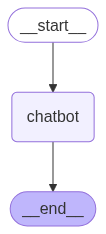

In [54]:
from IPython.display import Image,display
try:
  display(Image(graph.get_graph().draw_mermaid_png()))
except Exception:
  pass

In [ ]:
while True:
  user_input=input("User: ")
  if user_input.lower() in ["quit","q"]:
    print("Good Bye")
    break
  for event in graph.stream({'messages':("user",user_input)}):
    print(event.values())
    for value in event.values():
      print(value['messages'])
      print("Assistant:",value["messages"].content)


User: what is groq
dict_values([{'messages': AIMessage(content='GROQ (**GraphQL Object Query Language**) is a query language developed by Contentful for querying and manipulating data within their Contentful Content Management System (CMS). \n\nHere\'s a breakdown:\n\n**Key Features:**\n\n* **Structured Data Access:** GROQ focuses on querying data in a structured and intuitive way, using object-oriented concepts like dot notation and filtering.\n\n* **Powerful Filtering:** You can precisely filter data based on various criteria, including:\n    * Text fields (with operators like `=` , `!=`, `>`, `<`, `contains`, `startswith`, etc.)\n    * Number fields\n    * Date fields\n    * Arrays\n* **Relationships:** GROQ allows you to navigate through content relationships, retrieving related items (like entries linked through fields).\n* **Aggregations:**  You can perform basic aggregations (e.g., counting entries, finding averages) to analyze your content.\n\n* **Type Safety:** GROQ is designe